https://www.kaggle.com/datasets/waqi786/global-black-money-transactions-dataset?resource=download


Welcome to the Global Black Money Transactions Dataset! This extensive dataset provides a detailed view of black money transactions across multiple countries. The dataset is designed to offer insights into various aspects of financial movements often associated with illicit activities. With comprehensive attributes ranging from transaction amounts to risk scores, this dataset serves as a valuable resource for understanding the complexities of financial irregularities. Whether you're analyzing financial crime patterns or testing anti-money laundering algorithms, this dataset provides the essential data you need. 🚀

Columns:

- Transaction ID: Unique identifier for each transaction. (e.g., TX0000001)
- Country: Country where the transaction occurred. (e.g., USA, China)
- Amount (USD): Transaction amount in US Dollars. (e.g., 150000.00)
- Transaction Type: Type of transaction. (e.g., Offshore Transfer, Property Purchase)
- Date of Transaction: The date and time of the transaction. (e.g., 2022-03-15 14:32:00)
- Person Involved: Name or identifier of the person/entity involved. (e.g., Person_1234)
- Industry: Industry associated with the transaction. (e.g., Real Estate, Finance)
- Destination Country: Country where the money was sent. (e.g., Switzerland)
- Reported by Authority: Whether the transaction was reported to authorities. (e.g., True/False)
- Source of Money: Origin of the money. (e.g., Legal, Illegal)
- Money Laundering Risk Score: Risk score indicating the likelihood of money laundering (1-10). (e.g., 8)
- Shell Companies Involved: Number of shell companies used in the transaction. (e.g., 3)
- Financial Institution: Bank or financial institution involved in the transaction. (e.g., Bank_567)
- Tax Haven Country: Country where the money was transferred to a tax haven. (e.g., Cayman Islands)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Big_Black_Money_Dataset.csv')
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

#### Numerical Variables
- Amount (USD)
- Money Laundering Risk Score 
- Shell Companies Involved

#### Categorical Variables
- Counrty
- Transaction Type 
- Industry
- Destination Country 
- Reported by Authority
- Source of Money 
- Finalcial Insitution 
- Tax Haven Country

As per the understanding, we would be dropping the columns 'Transaction ID', 'Date of Transaction', 'Finalcial Institution', and 'Person Invovlved' from the dataset as these do not affect the money laundering process/ activity.

In [4]:
df.drop(['Transaction ID','Person Involved','Date of Transaction','Financial Institution'], axis = 1, inplace = True)
df.columns

Index(['Country', 'Amount (USD)', 'Transaction Type', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Tax Haven Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      10000 non-null  object 
 1   Amount (USD)                 10000 non-null  float64
 2   Transaction Type             10000 non-null  object 
 3   Industry                     10000 non-null  object 
 4   Destination Country          10000 non-null  object 
 5   Reported by Authority        10000 non-null  bool   
 6   Source of Money              10000 non-null  object 
 7   Money Laundering Risk Score  10000 non-null  int64  
 8   Shell Companies Involved     10000 non-null  int64  
 9   Tax Haven Country            10000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 713.0+ KB


In [6]:
df.isnull().sum() #hence the dataset is clean.

Country                        0
Amount (USD)                   0
Transaction Type               0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Tax Haven Country              0
dtype: int64

In [7]:
df.describe() #numerical columns

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


# 1. Univariate Analysis

In [8]:
df.columns

Index(['Country', 'Amount (USD)', 'Transaction Type', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Tax Haven Country'],
      dtype='object')

In [9]:
#defining numerical and categorical variables
numerical = ['Amount (USD)','Money Laundering Risk Score','Shell Companies Involved']
categorical = [_ for _ in df.columns if _ not in numerical]
len(categorical),len(numerical)

(7, 3)

### Categorical attributes

In [10]:
sns.set_style('darkgrid')

Country
China           1038
South Africa    1026
UK              1014
Brazil          1006
Russia           997
Singapore        995
India            990
Switzerland      985
UAE              976
USA              973
Name: count, dtype: int64


/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


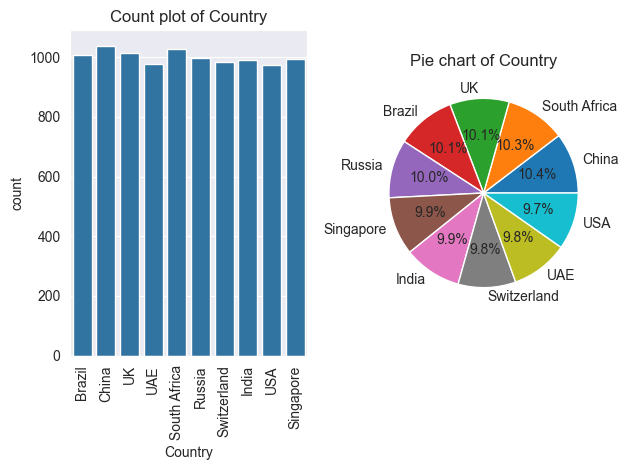

/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


________________________________________
Transaction Type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64


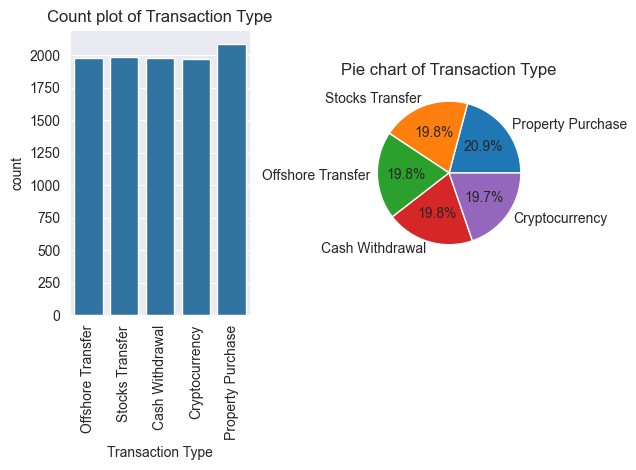

________________________________________
Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64


/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


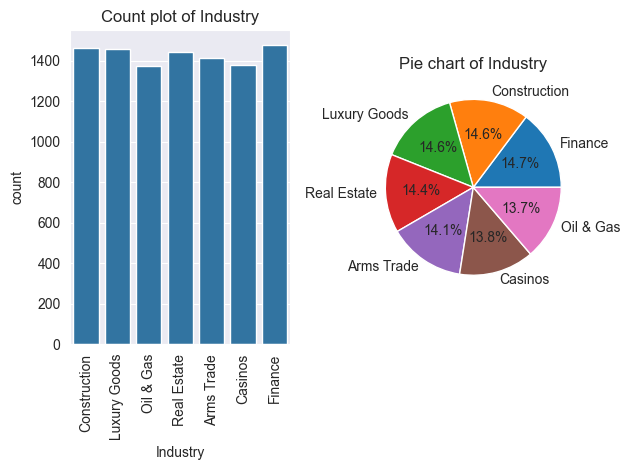

________________________________________
Destination Country
USA             1061
Russia          1035
India           1032
Singapore        999
South Africa     989
Switzerland      987
China            986
UK               981
UAE              970
Brazil           960
Name: count, dtype: int64


/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


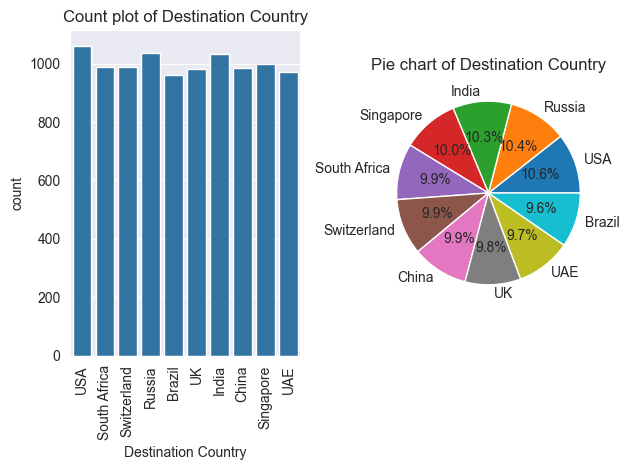

________________________________________
Reported by Authority
False    7995
True     2005
Name: count, dtype: int64


/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


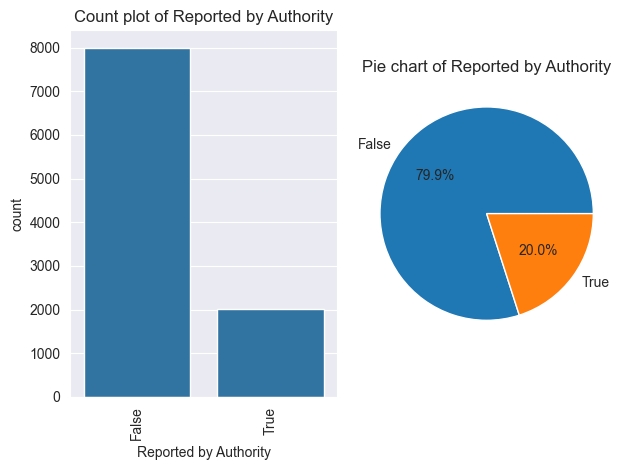

________________________________________
Source of Money
Illegal    7017
Legal      2983
Name: count, dtype: int64


/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


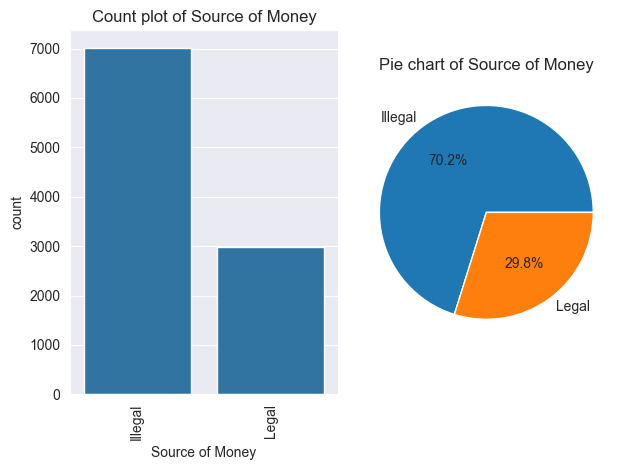

________________________________________
Tax Haven Country
Panama            1743
Luxembourg        1681
Cayman Islands    1676
Singapore         1644
Bahamas           1628
Switzerland       1628
Name: count, dtype: int64


/var/folders/t9/b1lqdctx21xcn7gy4n5kw_p40000gn/T/ipykernel_2794/1776090080.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


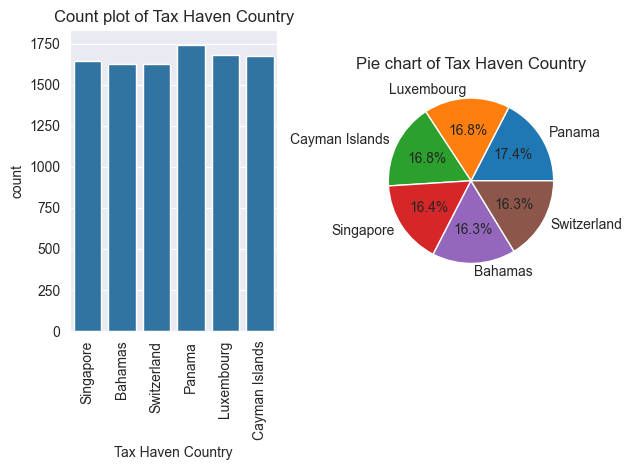

________________________________________


In [11]:
for col in categorical:
    print(df[col].value_counts())
    fig,ax = plt.subplots(1,2)
    sns.countplot(x=df[col], ax=ax[0])
    ax[0].set_title(f'Count plot of {col}')
    ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
    ax[1].pie(df[col].value_counts().values, labels=df[col].value_counts().keys(), autopct='%1.1f%%')
    ax[1].set_title(f'Pie chart of {col}')
    plt.tight_layout() 
    plt.show()

    print('_'*40)

### Observations:
- Most of the sources of money are illegal for these black money transactions (~70%)
- Most of these transactions are not being caught by the Finacial Institutions (~80%)
- The Black Money transactions are fairly equally distributed among the Tax Haven Countries, Country, Destination Country and Transaction Type 

### Numerical Attributes

In [12]:
df.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


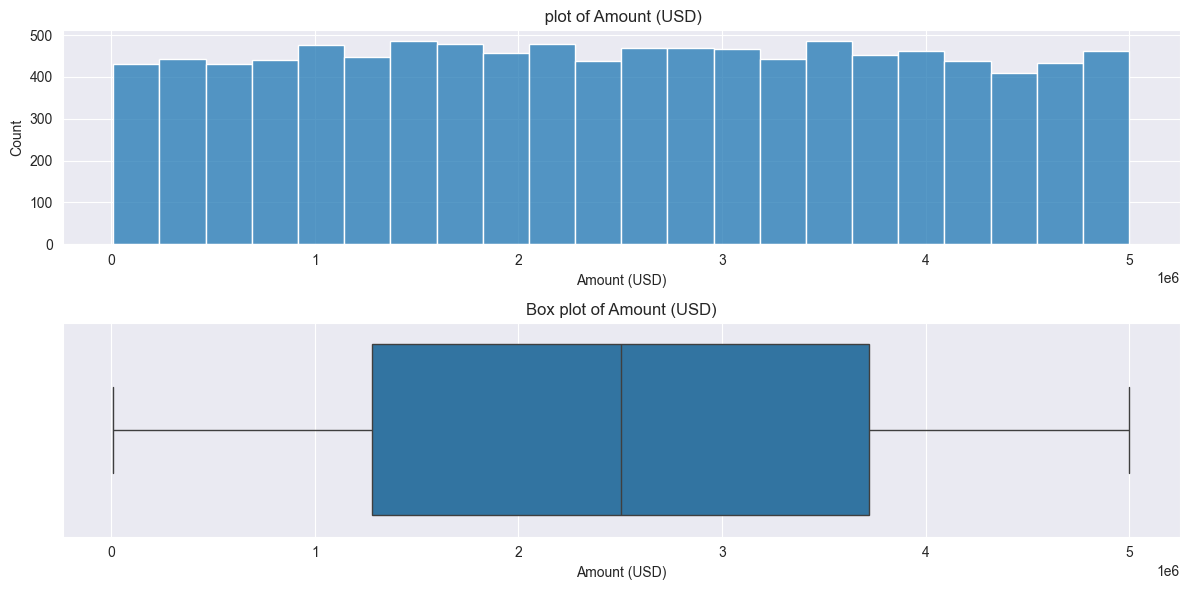

________________________________________


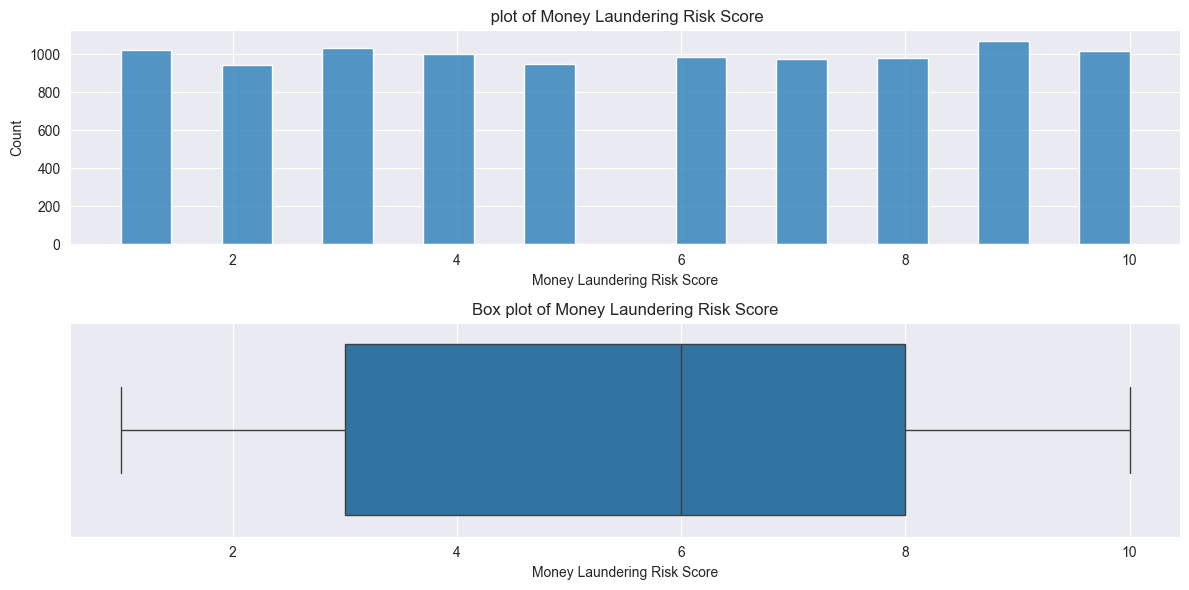

________________________________________


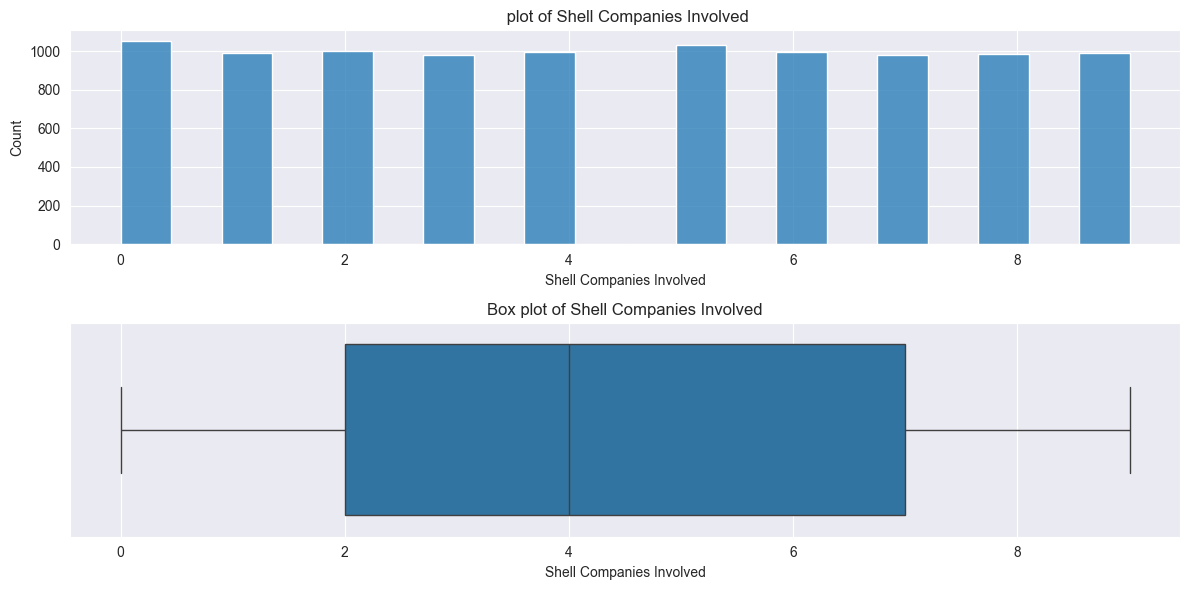

________________________________________


In [13]:
for col in numerical:
    #print(df[col].value_counts())
    fig,ax = plt.subplots(2,1,figsize = (12,6))
    sns.histplot(x=df[col], ax=ax[0])
    ax[0].set_title(f' plot of {col}')
    #ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
    #ax[1].pie(df[col].value_counts().values, labels=df[col].value_counts().keys(), autopct='%1.1f%%')
    sns.boxplot(x = df[col],ax = ax[1],orient = 'h')
    ax[1].set_title(f'Box plot of {col}')
    plt.tight_layout() 
    plt.show()

    print('_'*40)

### Observations:
- The amount of money laundered in each transactions is fairly equally distributed in the range ($10,000 - $5,000,000).
- The Money Laundering Risk Score and No of shell companies involved in each transaction also vary equally among the Black Money transactions. 

# 2. Multi-variate Analysis

In [14]:
#Bi-variate analysis that makes sense
df.columns

Index(['Country', 'Amount (USD)', 'Transaction Type', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Tax Haven Country'],
      dtype='object')

Bi-variate analysis that make sense: 
1. country vs destination country vs Risk Score
2. Amount vs country vs destination country 
3. Risk Score vs reporte by authority
4. shell companies involved vs country vs desination country vs amount 
5. industry vs money involved vs tax haven country 
6. amount vs transaction type vs 

#### Numerical-Numerical

In [41]:
df[['Amount (USD)','Shell Companies Involved','Money Laundering Risk Score']].corr()

,Amount (USD),Shell Companies Involved,Money Laundering Risk Score
Amount (USD),1.000000,-0.017905,0.016529
Shell Companies Involved,-0.017905,1.000000,-0.019262
Money Laundering Risk Score,0.016529,-0.019262,1.000000


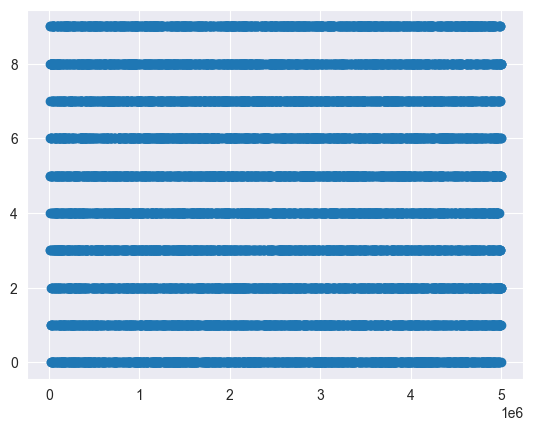

In [17]:
plt.scatter(x=df['Amount (USD)'],y=df['Shell Companies Involved'])

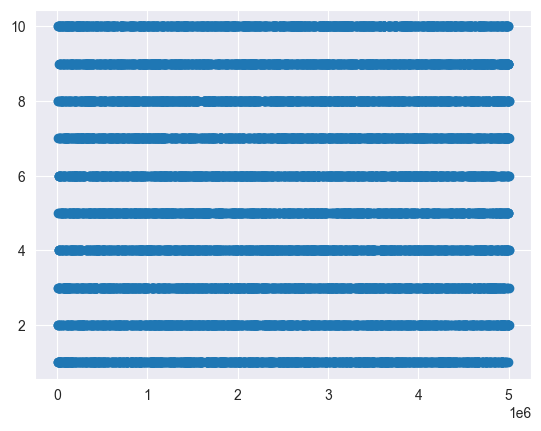

In [25]:
plt.scatter(x=df['Amount (USD)'],y=df['Money Laundering Risk Score'])

As evident from the Correlation Matrix and Scatter Plots, there is very little correlation (~0) between the different numerical features. That is, they are practically independent.

#### Numerical-Categorical

In [56]:
categorical, numerical

(['Country',
  'Transaction Type',
  'Industry',
  'Destination Country',
  'Reported by Authority',
  'Source of Money',
  'Tax Haven Country'],
 ['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved'])

<Axes: xlabel='Country', ylabel='Amount (USD)'>

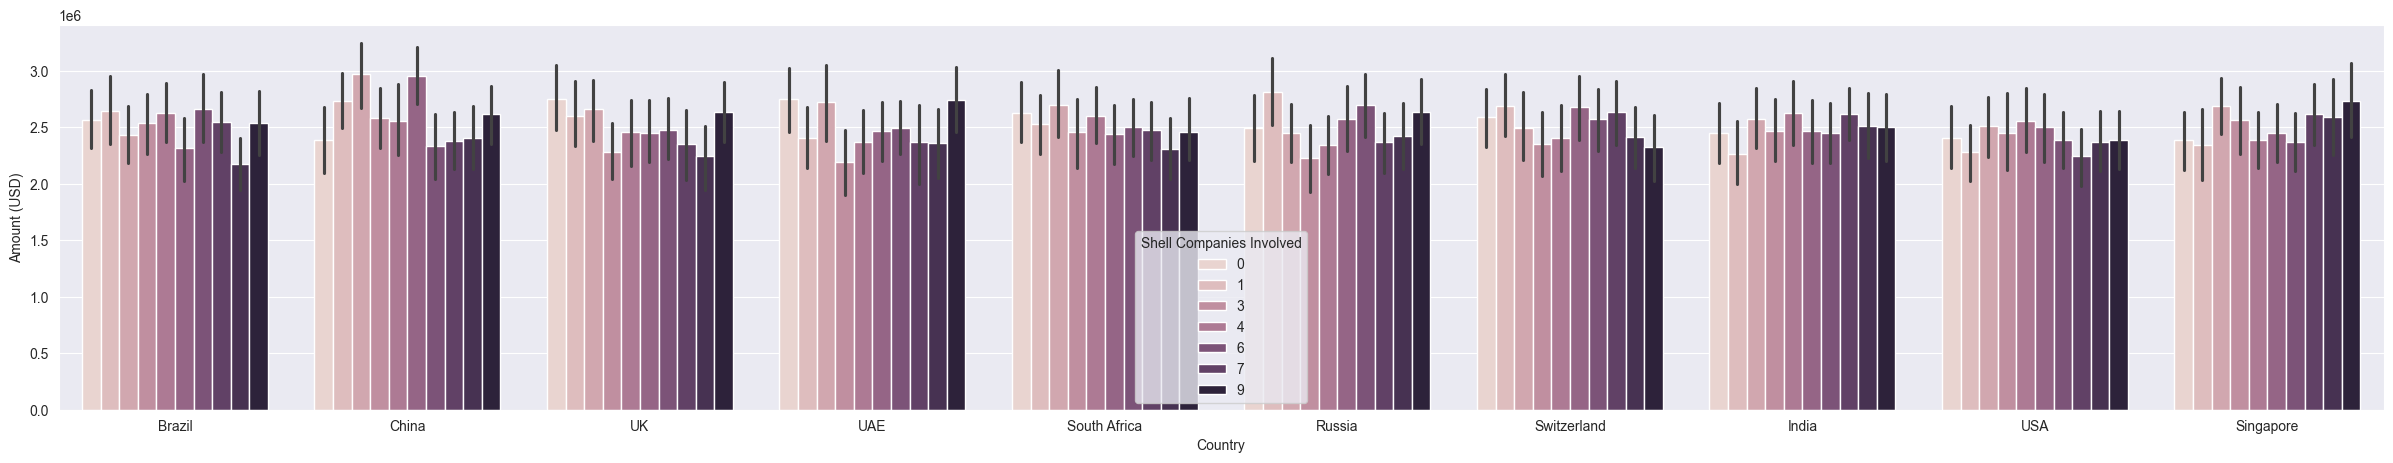

In [50]:
plt.figure(figsize = (30,5))
sns.barplot(data = df, x = 'Country', y = 'Amount (USD)',hue = 'Shell Companies Involved')

No obvious pattern between Amount (USD), Country, and No. of Shell companies involved

<Axes: xlabel='Country', ylabel='Money Laundering Risk Score'>

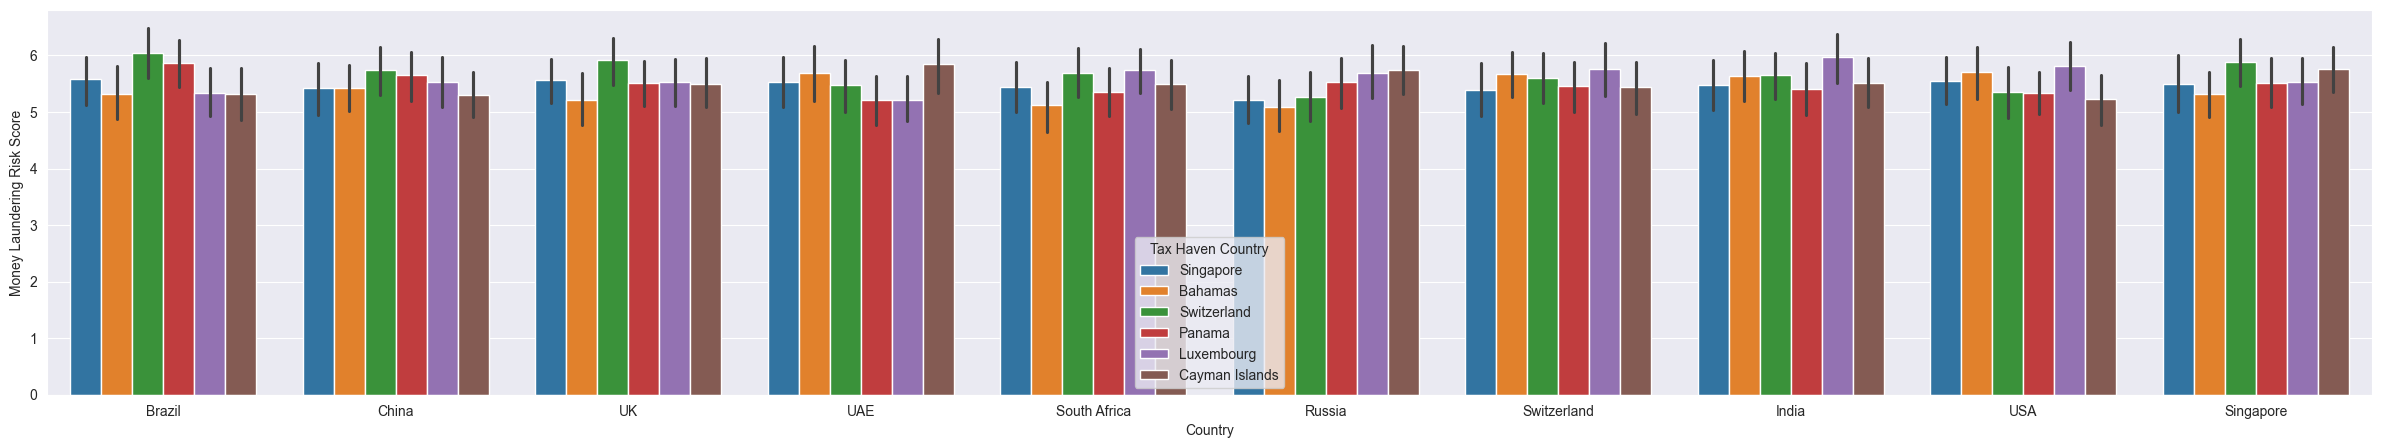

In [55]:
plt.figure(figsize = (30,5))
sns.barplot(data = df, x = 'Country', y = 'Money Laundering Risk Score',hue = 'Tax Haven Country')

<Axes: xlabel='Country', ylabel='Amount (USD)'>

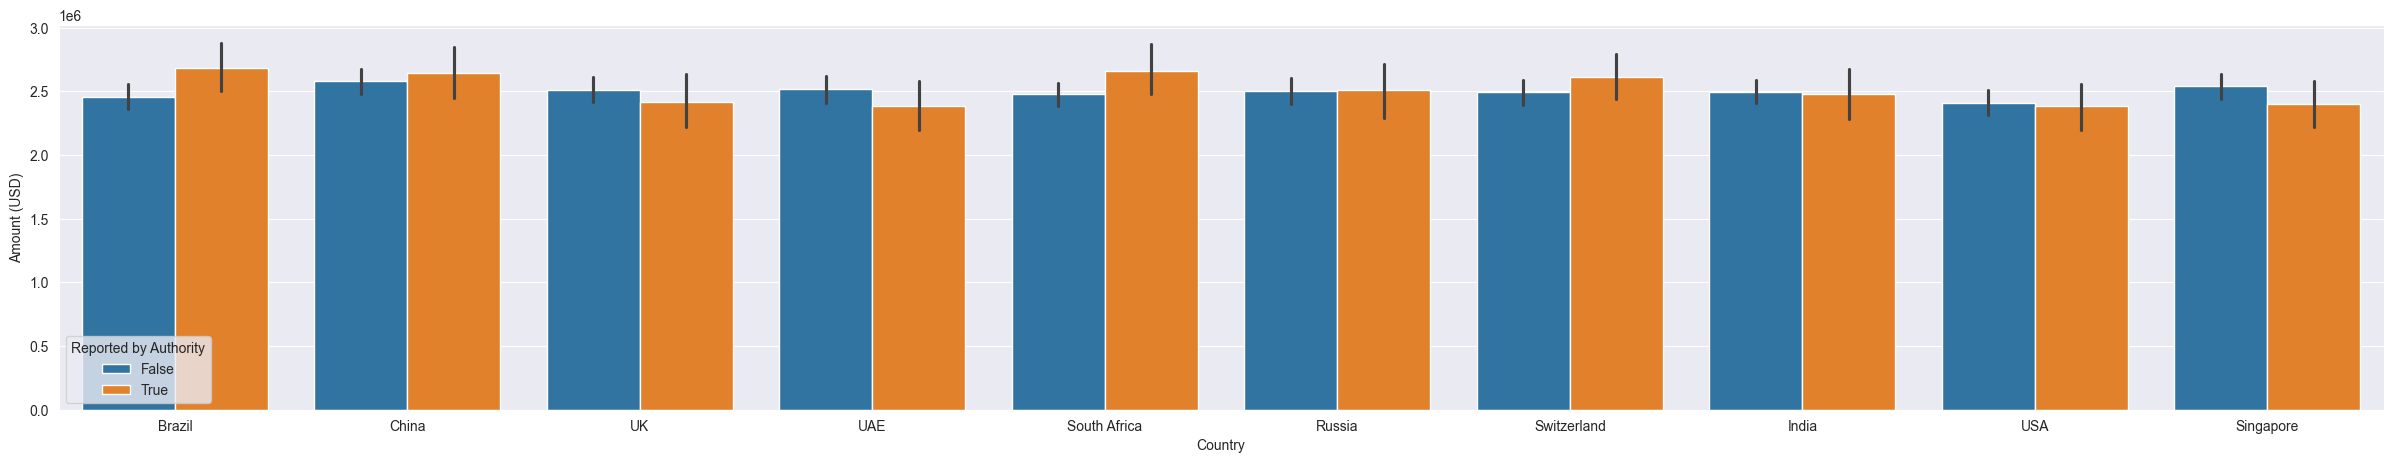

In [52]:
plt.figure(figsize = (30,5))
sns.barplot(data = df, x = 'Country', y = 'Amount (USD)',hue = 'Reported by Authority')

<Axes: xlabel='Country', ylabel='Amount (USD)'>

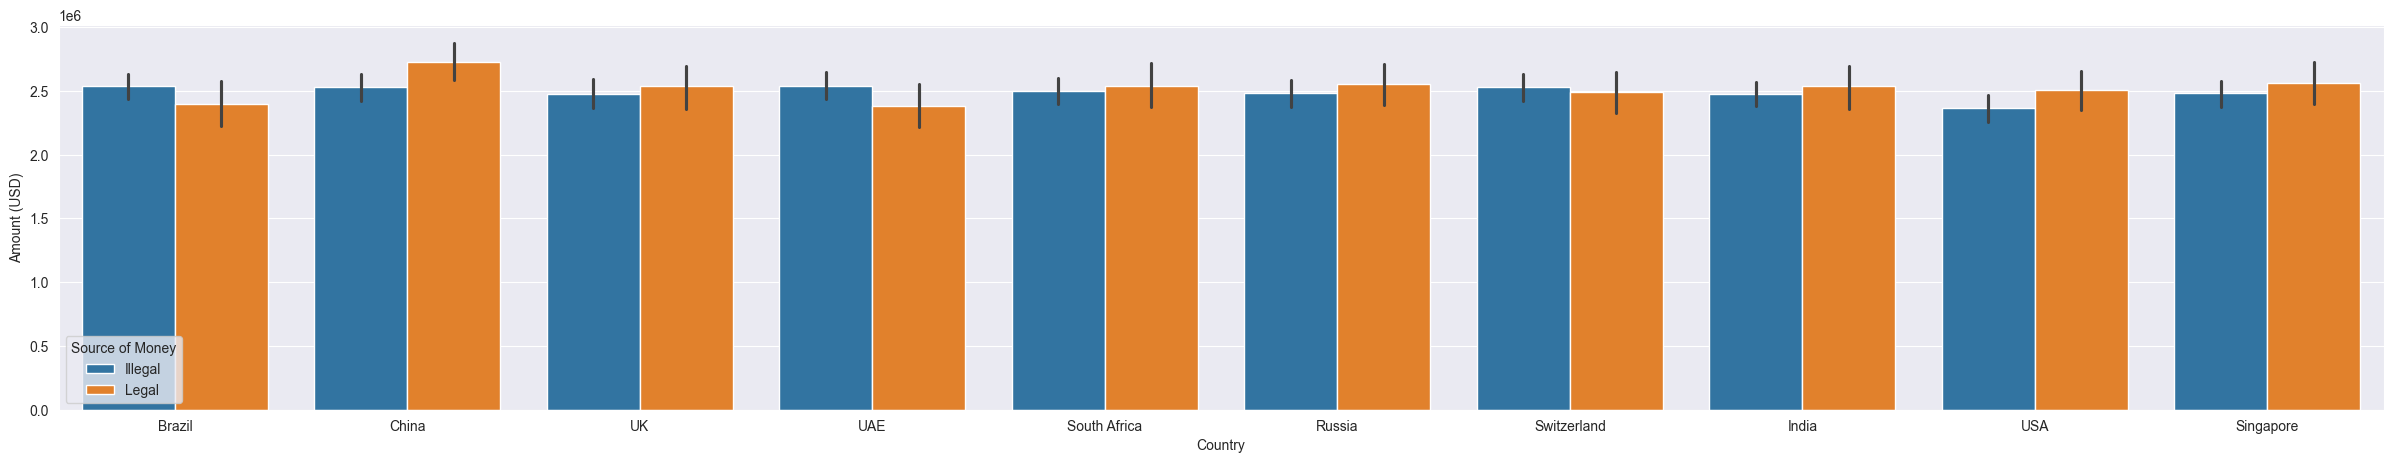

In [54]:
plt.figure(figsize = (30,5))
sns.barplot(data = df, x = 'Country', y = 'Amount (USD)',hue = 'Source of Money')

performing ANOVA test to check if there is significant difference between the means of numerical variables across different categories.

In [113]:
from scipy.stats import f_oneway

# Function to perform ANOVA test
def anova_test(df, num_var, cat_var):
    # Group data by the categorical variable and extract numerical values
    groups = [group[num_var].values for name, group in df.groupby(cat_var)]
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*groups)
    
    # print(f'ANOVA Test between {num_var} and {cat_var}:')
    # print(f'F-Statistic: {f_stat}, p-value: {p_value}')
    # print('-' * 50)
    return(p_value)

# Loop through all combinations of numerical and categorical variables
for num_var in numerical:
    for cat_var in categorical:
        pvalue = anova_test(df, num_var, cat_var)
        if pvalue<0.05:
            print(f"There is significant difference in '{num_var}' across groups defined by '{cat_var}'.")

There is significant difference in 'Money Laundering Risk Score' across groups defined by 'Industry'.
There is significant difference in 'Shell Companies Involved' across groups defined by 'Reported by Authority'.


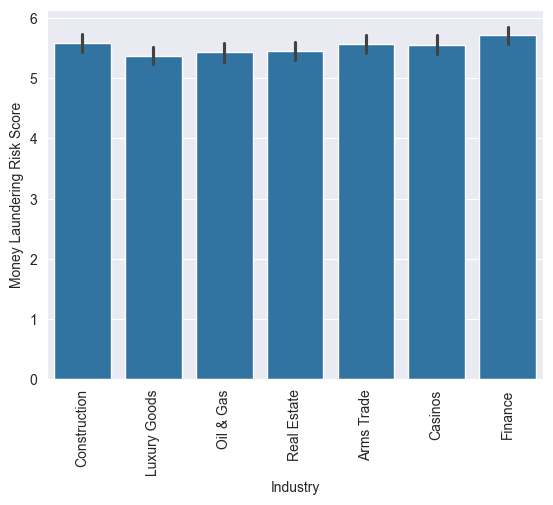

In [115]:
sns.barplot(data = df, x = 'Industry', y = 'Money Laundering Risk Score')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Reported by Authority', ylabel='Shell Companies Involved'>

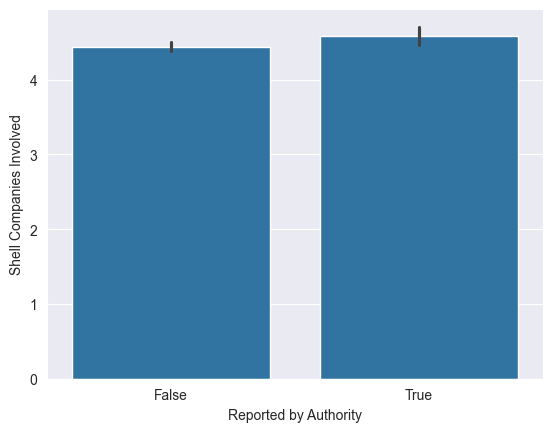

In [118]:
sns.barplot(data = df, x ='Reported by Authority', y = 'Shell Companies Involved')

#### Categorical-Categorical

##### performing chi-squared test of independence to verify that different categories are independent.

##### chi-squared test

In [81]:
from scipy.stats import chi2_contingency


# Function to perform Chi-square 
def chi2_test_of_independence(df, var1, var2):
    
    contingency_table = pd.crosstab(df[var1], df[var2])
    
    # chi-squared tesst
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    

    # print(f'Chi2 Test between {var1} and {var2}:')
    # print(f'Chi2 Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}')
    # print('Expected Frequencies:')
    # print(expected)
    # print('='*90)
    return (p)

# Loop through all combinations of categorical variables
print("Chi-squared test Results")
print("="*24)
for i in range(len(categorical)):
    for j in range(i + 1, len(categorical)):
        # chi2_test_of_independence(df, categorical[i], categorical[j])
        pvalue = chi2_test_of_independence(df, categorical[i], categorical[j])
        if pvalue<0.05: #if p<critical value, we are declaring vars as indepdendent.
            print(f"'{categorical[i]}' and '{categorical[j]}' are not indepdendent with p-value {pvalue}.")

print(f' Rest of the categorical variables are indepdendent with 95% confidence level.')

Chi-squared test Results
'Transaction Type' and 'Tax Haven Country' are not indepdendent with p-value 0.0034399538602876466.
'Industry' and 'Reported by Authority' are not indepdendent with p-value 0.04638317224472215.
 Rest of the categorical variables are indepdendent with 95% confidence level.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Offshore Transfer'),
  Text(1, 0, 'Stocks Transfer'),
  Text(2, 0, 'Cash Withdrawal'),
  Text(3, 0, 'Cryptocurrency'),
  Text(4, 0, 'Property Purchase')])

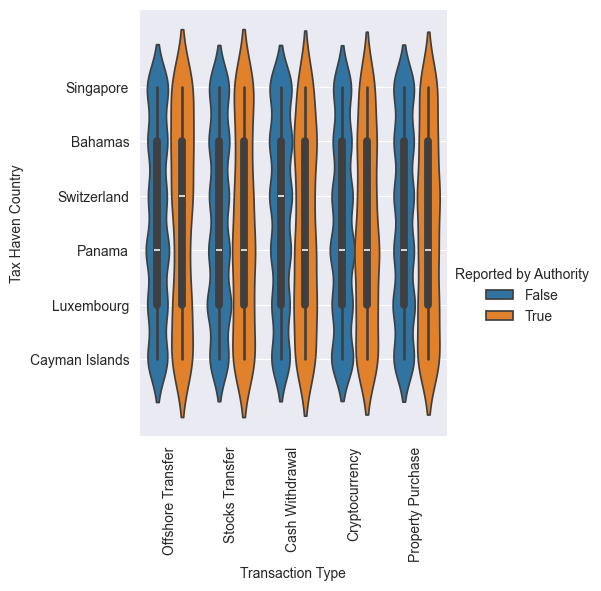

In [136]:
sns.catplot(data = df, x = 'Transaction Type', y = 'Tax Haven Country',kind = 'violin',hue = 'Reported by Authority')
plt.xticks(rotation = 90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Offshore Transfer'),
  Text(1, 0, 'Stocks Transfer'),
  Text(2, 0, 'Cash Withdrawal'),
  Text(3, 0, 'Cryptocurrency'),
  Text(4, 0, 'Property Purchase')])

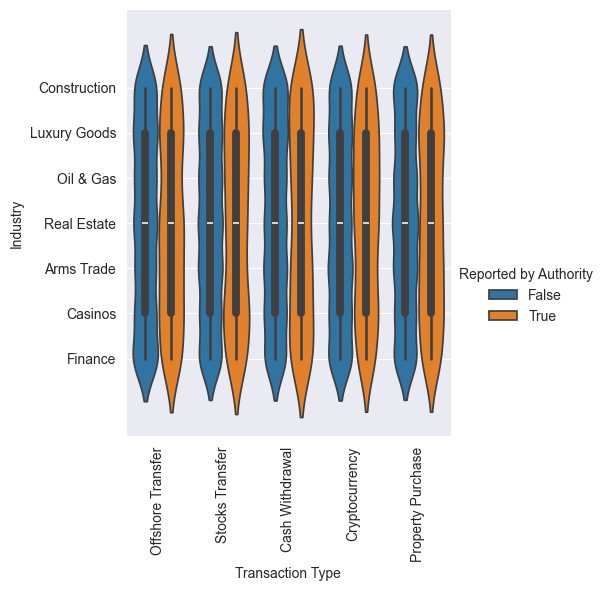

In [137]:
sns.catplot(data = df, x = 'Transaction Type', y = 'Industry',kind = 'violin',hue = 'Reported by Authority')
plt.xticks(rotation = 90)
